In [1]:
#Importamos las librerías a utilizar
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import numpy as np
import statsmodels.api as sm
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

#Importamos los 2 data sources y los unimos en un único dataframe utilizando el order id
csv1 = pd.read_csv('datatable 1.csv', sep = ';', decimal=',', low_memory=False)
csv2 = pd.read_csv('datatable 2.csv', sep = ';', decimal=',')
df = pd.merge(csv1, csv2, on="ecomm_order_id", how="inner")
df['Genero'] = df['Genero'].str.strip()

pd.set_option('display.max_columns', None)
df.head()

,ecomm_order_id,ecommerce,store,ecomm_creation_date_x,numero_lote,fecha_facturado,linea,marca,vArticulo_id,vTalle_Codigo,producto,quantity,client_price,PrecioCosto,ecomm_tipo_envio,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular,ecomm_transporte_nombre,sucursal_original,ultima_sucursal,ColorPrimario,ProveedorId,Disciplina,Genero,description,ecomm_creation_date_y,date_handling,date_invoiced,email,adress_id,latitude,longitude,payment
0,1100030631314-01,vtex,Dash,2021-01-01 03:10:27.000,8851.0,2021-01-04 15:04:11.400,INDUMENTARIA,ADIDAS FUTBOL,266-0971,XL *,CAMPERA ADIDAS RIVER PLATE 20/21 266-0971-XL,1,9999.0,5366.46,residential,6439.30,11999.0,Envio a domicilio Estándar,NaN,NaN,GRIS ...,FQ7691,FUTBOL,HOMBRE,vtex,2021-01-01 00:10:27,2021-01-01 00:31:02,2021-01-04 15:12:03,1027da2f210a4469885a6f4e8590d1e1@ct.vtex.com.br,4828411093815,-56.853599548339844,-27.50750160217285,MercadoPago
1,1100040613312-01,vtex,Grid,2021-01-01 01:10:06.000,8851.0,2021-01-04 15:35:05.970,CALZADO ADULTOS,NIKE,306-6695,11 *,ZAPATILLAS JORDAN AIR MAX 200 306-6695-11.0,1,15999.0,8420.53,residential,8420.53,11799.0,Envio a domicilio Estándar,NaN,NaN,BLANCO,CD6105-100,BASKET,HOMBRE,vtex,2021-01-01 01:10:06,2021-01-01 01:36:02,2021-01-04 15:43:02,21a3d349322a49f78fe19cd12a6b723c@ct.vtex.com.br,4828421937843,-67.82970428466797,-38.97628402709961,MercadoPago
2,1100043415822-01,vtex,Grid,2021-01-01 03:56:54.000,8851.0,2021-01-04 15:36:03.567,CALZADO ADULTOS,NIKE,306-6997,10.5,BOTITAS JORDAN AIR 6 RETRO 306-6997-10.5,1,19199.2,12631.05,residential,12631.05,16499.0,Envio a domicilio Estándar,NaN,NaN,NEGRO,CT8529-062,BASKET,NIÑOS,vtex,2021-01-01 00:56:54,2021-01-01 01:21:03,2021-01-04 15:45:06,02d8f6f774044c66bdf6c39cab165db9@ct.vtex.com.br,4779119470893,-58.59366226196289,-34.58610153198242,MercadoPago
3,1100043415822-01,vtex,Grid,2021-01-01 03:56:54.000,8851.0,2021-01-04 15:36:03.567,CALZADO ADULTOS,NIKE,306-6997,13 *,BOTITAS JORDAN AIR 6 RETRO 306-6997-13.0,1,19199.2,12631.05,residential,12631.05,16499.0,Envio a domicilio Estándar,NaN,NaN,NEGRO,CT8529-062,BASKET,NIÑOS,vtex,2021-01-01 00:56:54,2021-01-01 01:21:03,2021-01-04 15:45:06,02d8f6f774044c66bdf6c39cab165db9@ct.vtex.com.br,4779119470893,-58.59366226196289,-34.58610153198242,MercadoPago
4,1100071553744-01,vtex,Grid,2021-01-01 07:25:43.000,8851.0,2021-01-04 15:36:32.500,CALZADO ADULTOS,NIKE,306-6997,13 *,BOTITAS JORDAN AIR 6 RETRO 306-6997-13.0,1,23999.0,12631.05,residential,12631.05,16499.0,Envio a domicilio Estándar,NaN,NaN,NEGRO,CT8529-062,BASKET,NIÑOS,vtex,2021-01-01 04:25:43,2021-01-01 04:46:02,2021-01-04 15:42:22,4ca574a0012b40aa89676a2dd4f928a4@ct.vtex.com.br,4828456959747,-58.38155746459961,-34.60368347167969,creditCard


In [2]:
#Agregamos la variable "ganancia" (precio - costo) para analizar algunas cuestiones en base a la misma
df["ganancia"] = df["client_price"] - df["VArticuloTalle_Costo"]
df[['client_price','VArticuloTalle_Costo','ganancia']]

,client_price,VArticuloTalle_Costo,ganancia
0,9999.0,6439.30,3559.70
1,15999.0,8420.53,7578.47
2,19199.2,12631.05,6568.15
3,19199.2,12631.05,6568.15
4,23999.0,12631.05,11367.95
...,...,...,...
34222,459.0,225.60,233.40
34223,4239.0,2228.37,2010.63
34224,3499.0,3101.07,397.93
34225,13999.0,7894.21,6104.79


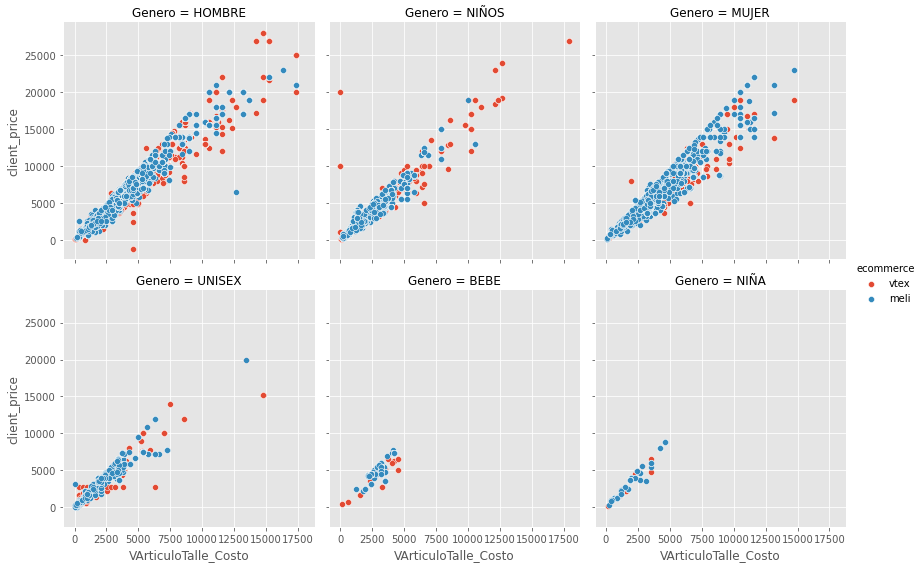

In [5]:
#Scatterplot precio y costo dividido por cada género y por ecommerce 
g = sns.FacetGrid(df, col="Genero",  hue="ecommerce", height=4, col_wrap=3)
g.map(sns.scatterplot, "VArticuloTalle_Costo", "client_price")
g.add_legend()
plt.show()

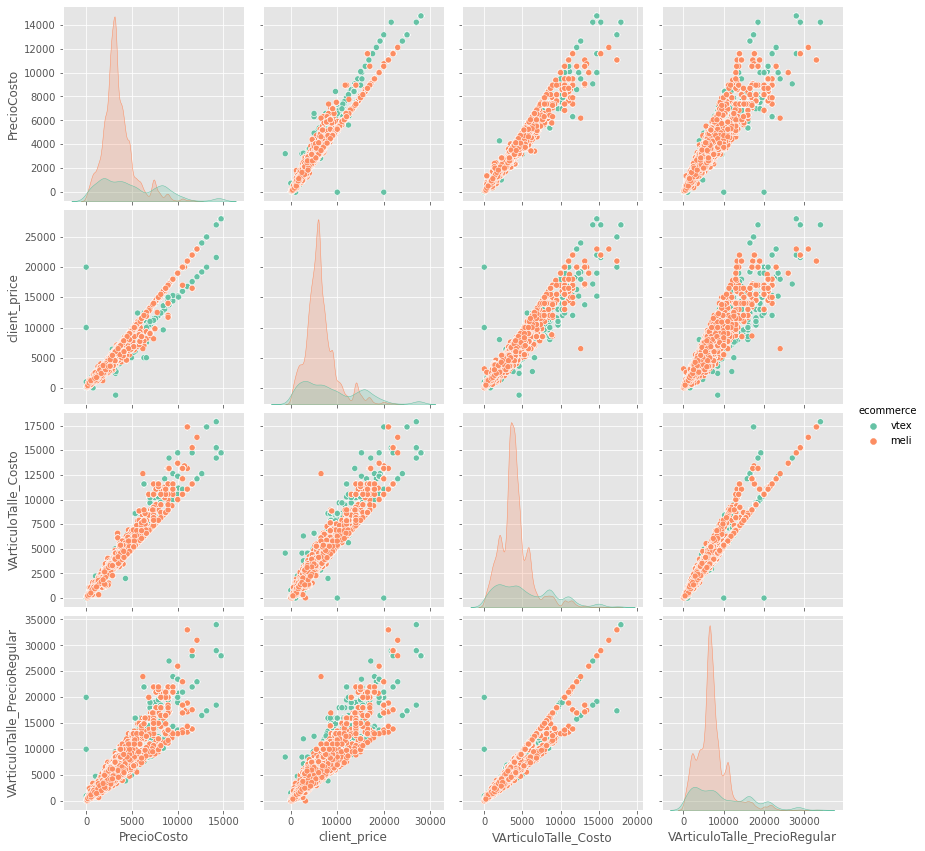

In [6]:
#Pairplot variables cuantitativas dividido por ecommerce
sns.pairplot(df[['PrecioCosto','client_price','VArticuloTalle_Costo','VArticuloTalle_PrecioRegular', 'ecommerce']], hue = 'ecommerce' , height = 3 , palette = 'Set2')
plt.show()

In [10]:
#Análisis de cantidad vendida y ganancia por disciplina
df_disciplina = pd.DataFrame(df.groupby('Disciplina').sum())[['quantity', 'ganancia']]
df_disciplina

,quantity,ganancia
Disciplina,,
Generica,14,5.717890e+03
ACCESORIOS,57,3.583701e+04
ATHLETIC,102,5.211876e+04
BASKET,3250,2.062879e+07
CLASSIC,38,1.983524e+04
CORE,59,1.651606e+05
ENTRENAMIENTO,7719,1.324296e+07
FUTBOL,1864,2.652687e+06
HOCKEY,66,1.269619e+04


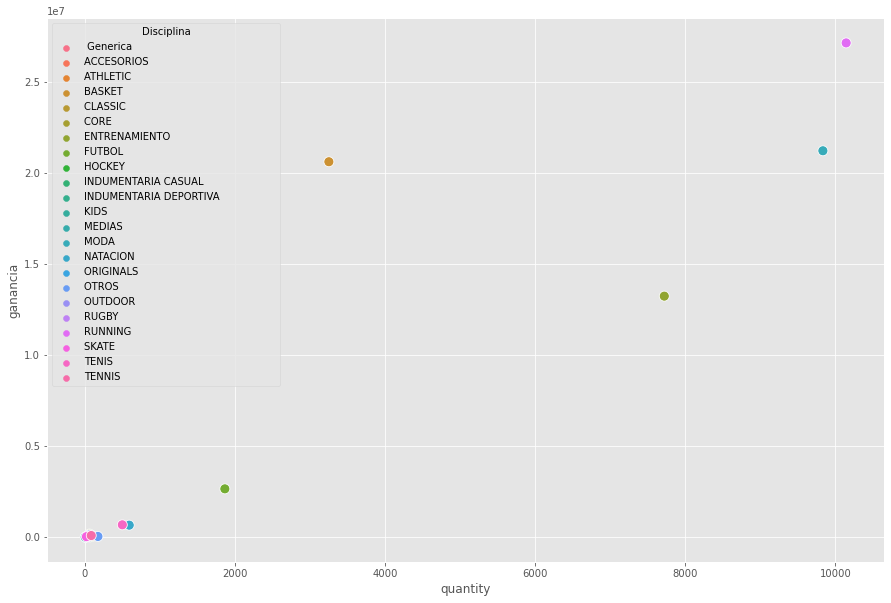

In [12]:
plt.subplots(figsize=(15, 10))
sns.scatterplot(x='quantity', y='ganancia', hue=df_disciplina.index, data=df_disciplina, s=100)
plt.show()

In [13]:
#Análisis de componentes principales para cada tienda usando las variables cuantitativas
df_store = pd.DataFrame(df.groupby('store').sum())[['quantity', 'PrecioCosto','client_price','VArticuloTalle_Costo','VArticuloTalle_PrecioRegular']]
df_store

,quantity,PrecioCosto,client_price,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular
store,,,,,
Adidas Original,46,2.057938e+05,252955.00,2.130386e+05,321655.0
Adidas Performance,969,2.883221e+06,5572172.60,3.844025e+06,6837564.0
Dash,13200,3.393745e+07,63963112.07,4.078071e+07,71077413.8
Fila,1861,5.278003e+06,10286511.00,6.402415e+06,11644450.0
Grid,7306,3.995236e+07,74940899.43,4.585591e+07,80748887.3
Mark,4168,1.344602e+07,25697694.75,1.636752e+07,27840203.3
Nike,4005,1.944557e+07,37692426.00,2.400073e+07,42491306.8
Puma,2452,8.003042e+06,15608128.16,9.373170e+06,16132720.0
Rebook Argentina,209,6.074149e+05,1146623.00,6.975520e+05,1133023.0


In [14]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_store)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
pca_pipe.fit(df_store)

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_store.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
)

,quantity,PrecioCosto,client_price,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular
PC1,0.425379,0.452165,0.452220,0.452959,0.452686
PC2,0.904062,-0.234251,-0.234221,-0.181103,-0.200352
PC3,-0.036342,-0.671943,-0.261422,0.405543,0.560683
PC4,-0.005949,-0.382695,0.481718,0.508617,-0.602301
PC5,0.019218,-0.377770,0.663509,-0.582129,0.278931


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[9.69862472e-01 2.99832923e-02 1.34349620e-04 1.30842754e-05
 6.80190337e-06]


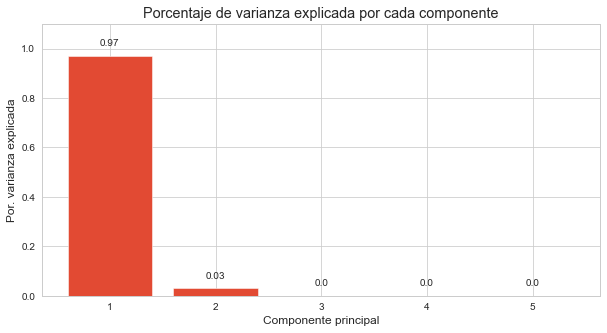

In [15]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_store.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [16]:
# Proyección de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(X=df_store)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
    index   = df_store.index
)
proyecciones

,PC1,PC2,PC3,PC4,PC5
store,,,,,
Adidas Original,-1.880164,-0.024536,-0.010808,-0.004192,-0.005342
Adidas Performance,-1.380559,0.008747,0.017317,-0.005412,-0.004798
Dash,4.189846,0.928329,-0.000556,-0.004859,-0.000657
Fila,-0.963668,0.069989,0.003776,-0.007422,0.010060
Grid,4.237455,-0.801869,-0.031870,-0.004923,-0.001243
Mark,0.396792,0.098221,-0.000619,0.018526,-0.008366
Nike,1.255553,-0.350498,0.070906,0.003347,0.002729
Puma,-0.551655,0.046172,-0.025567,0.013484,0.011583
Rebook Argentina,-1.805230,-0.012724,-0.012737,-0.000906,-0.002075


In [19]:
proyecciones = np.dot(modelo_pca.components_, scale(df_store).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
proyecciones = proyecciones.transpose().set_index(df_store.index)
proyecciones

,PC1,PC2,PC3,PC4,PC5
store,,,,,
Adidas Original,-1.880164,-0.024536,-0.010808,-0.004192,-0.005342
Adidas Performance,-1.380559,0.008747,0.017317,-0.005412,-0.004798
Dash,4.189846,0.928329,-0.000556,-0.004859,-0.000657
Fila,-0.963668,0.069989,0.003776,-0.007422,0.010060
Grid,4.237455,-0.801869,-0.031870,-0.004923,-0.001243
Mark,0.396792,0.098221,-0.000619,0.018526,-0.008366
Nike,1.255553,-0.350498,0.070906,0.003347,0.002729
Puma,-0.551655,0.046172,-0.025567,0.013484,0.011583
Rebook Argentina,-1.805230,-0.012724,-0.012737,-0.000906,-0.002075


Text(0, 0.5, 'PC2')

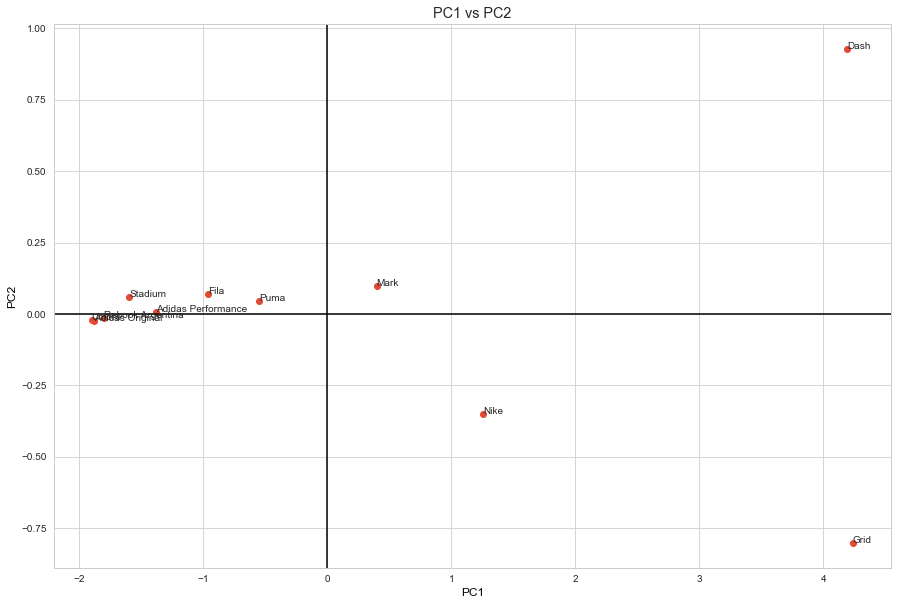

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
proyecciones['val']=proyecciones.index

ax = proyecciones.set_index('PC1')['PC2'].plot(style='o')

def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], str(point['val']))

label_point(proyecciones.PC1, proyecciones.PC2, proyecciones.val, ax)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2')
plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')